# Métodos Numericos 2022

## Final - 10 de Agosto de 2022 - Tema 1

### No olvide ingresar su(s):

**APELLIDO(S):**

**NOMBRE(S):**

Al **finalizar el examen**, Ud. tiene que **subir** la notebook al **Moodle** (aula virtual)

https://famaf.aulavirtual.unc.edu.ar

y enviar por email una copia de seguridad al profesor del teórico, Francisco A. Tamarit (Pancho)

  [francisco.tamarit@unc.edu.ar](francisco.tamarit@unc.edu.ar)
    
Si por alguna eventualidad no puede subir el examen al Moodle, alternativamente, envíe el examen por email a los profesores del práctico de Julia, Oscar Reula oreula@unc.edu.ar y Juan I. Perotti juan.perotti@unc.edu.ar.

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Si lo considera necesario, agregue comentarios a su código.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.
   
* **NOTA:** Durante la **corrección**, el comando `Kernel -> Restart & Run All` es ejecutado, de manera que la notebook es reiniciada y todas sus celdas son recalculadas *a limpio*, borrando todos los datos anteriores. Por lo tanto, **antes de entregar**, asegurese de ejecutar el comando `Kernel -> Restart & Run All` del menú, cerciórandose que todas las celdas se ejecutan de forma debida.

In [1]:
using Plots
using LaTeXStrings
#using DataFrames
#using CSV

In [2]:
#import Pkg; Pkg.add("DataFrames")

## Problema 1

Realice los cálculos empleando los métodos del **trapecio** y de **Simpson**.

**a)** Para cada método, escriba un programa que calcule una aproximación $A_n$ a la integral
$$
I = \int_0^{\pi/2} x^2 \cos(x) dx = (\pi /2)^2 - 2            
$$
para distintos valores del número de intervalos $n$ donde se evaluará la función que se desea integrar. 

**b)** Grafique la función a integrar en el intervalo de interés.

**c)** Para cada método, calcule un vector de componentes $A_n$ para $n = 2^k $ con $k=1,...,12$.

**d)** Para cada método y para los mismos valores de $n$, calcule un vector cuyas componentes sean los errores relativos $\varepsilon_n = |A_n - I|/|I|$.

**e)** Teniendo en cuenta que $h=\pi/(2n)$, verifique para los diferentes valores de $h$ (i.e. de $n$) que el cociente de precisión definido como
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)} \, ,
$$
toma un valor aproximado a $4$ cuando se usa la regla del **trapecio**, y un valor aproximado a $16$ cuando se usa la regla de **Simpson**. Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**f)** Genere un gráfico **log-log** comparativo de los errores relativos. Es decir, en un mismo gráfico, grafique  el error relativo $\epsilon_n$ vs $n$ obtenido con cada método. Observe que
$$
\epsilon_n \approx Cn^\alpha \Rightarrow \log \epsilon_n = \alpha \log n + \ln C.
$$
donde $C$ es una constante.
Esto significa que una dependencia tipo ley de potencias aparece como una línea recta en un gráfico **log-log**. Use el gráfico para estimar el exponente $\alpha$ en las leyes de potencia. Agrege al gráfico curvas de la forma $f(n)=A \times n^{-\beta}$ vs $n$, siendo $\beta$ el exponente apropiado para cada caso.

**g)** Justifique los valores de $\beta$ hallados.

**Rta 1.a)**

In [3]:
using Printf
# Definición de la función a integrar
f(x) = x^2 * cos(x)
# Regla del Punto Medio
function midpoint_rule(a, b)
    mid = (a + b) / 2
    return (b - a) * f(mid)
end
# Regla del Trapecio
function trapezoidal_rule(a, b)
    return (b - a) / 2 * (f(a) + f(b))
end
# Regla de Simpson
function simpson_rule(a, b)
    mid = (a + b) / 2
    return (b - a) / 6 * (f(a) + 4 * f(mid) + f(b))
end
# Valores del intervalo
a = 0
b = π / 2
# Valores de n para evaluar
n_values = [1, 2, 4, 10]
# Resultado exacto de la integral
exact_result = (π / 2)^2 - 2
println("Valor exacto de la integral: ", exact_result)
# Cálculos y resultados
println("\nRegla del Punto Medio:")
for n in n_values
    h = (b - a) / n
    approx = 0.0
    for i in 0:(n-1)
        approx += midpoint_rule(a + i*h, a + (i+1)*h)
    end
    println("n = $n, Aproximación = ", approx, ", Error = ", abs(approx - exact_result))
end
println("\nRegla del Trapecio:")
for n in n_values
    h = (b - a) / n
    approx = 0.0
    for i in 0:(n-1)
        approx += trapezoidal_rule(a + i*h, a + (i+1)*h)
    end
    println("n = $n, Aproximación = ", approx, ", Error = ", abs(approx - exact_result))
end
println("\nRegla de Simpson:")
for n in n_values
    if n % 2 == 0
        h = (b - a) / n
        approx = 0.0
        for i in 0:(n-1)
            approx += simpson_rule(a + i*h, a + (i+1)*h)
        end
        println("n = $n, Aproximación = ", approx, ", Error = ", abs(approx - exact_result))
    else
        println("n = $n, debe ser par para el método de Simpson.")
    end
end

Valor exacto de la integral: 0.4674011002723395

Regla del Punto Medio:
n = 1, Aproximación = 0.6851483906245723, Error = 0.21774729035223284
n = 2, Aproximación = 0.5290482807352344, Error = 0.06164718046289486
n = 4, Aproximación = 0.4831512700349365, Error = 0.01575016976259702
n = 10, Aproximación = 0.46993517324035194, Error = 0.0025340729680124463

Regla del Trapecio:
n = 1, Aproximación = 1.1866167965626997e-16, Error = 0.4674011002723394
n = 2, Aproximación = 0.3425741953122862, Error = 0.12482690496005328
n = 4, Aproximación = 0.4358112380237603, Error = 0.03158986224857918
n = 10, Aproximación = 0.4623307058778377, Error = 0.005070394394501798

Regla de Simpson:
n = 1, debe ser par para el método de Simpson.
n = 2, Aproximación = 0.4668902522609183, Error = 0.0005108480114212055
n = 4, Aproximación = 0.46737125936454443, Error = 2.9840907795064542e-5
n = 10, Aproximación = 0.4674003507861805, Error = 7.494861590240376e-7


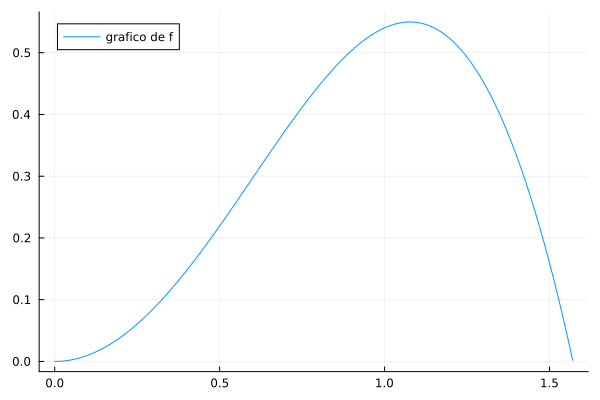

In [4]:
f(x)=(x^2)*cos(x)
plot(0:0.001:π/2,f,label="grafico de f")

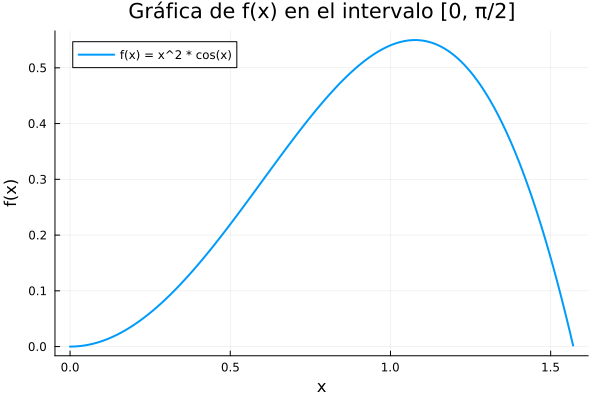

In [5]:
using Plots
# Definición de la función a integrar
f(x) = x^2 * cos(x)
# Intervalo de interés
a=0
b=π/2
# Graficar la función
plot(a:0.01:b,f, label="f(x) = x^2 * cos(x)", xlabel="x", ylabel="f(x)", title="Gráfica de f(x) en el intervalo [0, π/2]", linewidth=2)

In [6]:
using Printf
# Definición de la función a integrar
f(x) = x^2 * cos(x)
# Método del Trapecio
function trapezoidal(a, b, n)
    h = (b - a) / n
    sum = 0.5 * (f(a)+f(b))
    for i in 1:(n-1)
        sum += f(a+i*h)
    end
    return h * sum
end
# Método de Simpson
function simpson(a, b, n)
    if n % 2 != 0
        error("n debe ser un número par para el método de Simpson")
    end
    h = (b-a)/n
    sum = f(a) + f(b)
    for i in 1:2:(n-1)
        sum += 4 * f(a + i*h)
    end
    for i in 2:2:(n-2)
        sum += 2 * f(a + i*h)
    end
    return (h/3)*sum
end

# Valores del intervalo
a = 0
b = π / 2

# Valores de k para evaluar
k_values = 1:12

# Vectores para almacenar las aproximaciones
trapecio_results = Float64[]
simpson_results = Float64[]

# Calcular y almacenar los resultados
println("\nMétodo del Trapecio:")
for k in k_values
    n = 2^k
    approx = trapezoidal(a, b, n)
    push!(trapecio_results, approx)
    println("n = $n, Aproximación = ", approx)
end

println("\nMétodo de Simpson:")
for k in k_values
    n = 2^k
    if n % 2 == 0
        approx = simpson(a, b, n)
        push!(simpson_results, approx)
        println("n = $n, Aproximación = ", approx)
    else
        println("n = $n, debe ser par para el método de Simpson.")
    end
end

# Resultados
trapecio_results
simpson_results



Método del Trapecio:
n = 2, Aproximación = 0.3425741953122862
n = 4, Aproximación = 0.43581123802376037
n = 8, Aproximación = 0.4594812540293484
n = 16, Aproximación = 0.46541976354771075
n = 32, Aproximación = 0.4669056805094859
n = 64, Aproximación = 0.46727723998847753
n = 128, Aproximación = 0.4673701348675165
n = 256, Aproximación = 0.46739335890026923
n = 512, Aproximación = 0.4673991649280183
n = 1024, Aproximación = 0.4674006164361774
n = 2048, Aproximación = 0.4674009793132938
n = 4096, Aproximación = 0.4674010700325769

Método de Simpson:
n = 2, Aproximación = 0.4567655937497149
n = 4, Aproximación = 0.4668902522609183
n = 8, Aproximación = 0.4673712593645444
n = 16, Aproximación = 0.46739926672049814
n = 32, Aproximación = 0.46740098616341086
n = 64, Aproximación = 0.46740109314814127
n = 128, Aproximación = 0.4674010998271958
n = 256, Aproximación = 0.46740110024452003
n = 512, Aproximación = 0.4674011002706007
n = 1024, Aproximación = 0.46740110027223125
n = 2048, Aproxim

12-element Vector{Float64}:
 0.4567655937497149
 0.4668902522609183
 0.4673712593645444
 0.46739926672049814
 0.46740098616341086
 0.46740109314814127
 0.4674010998271958
 0.46740110024452003
 0.4674011002706007
 0.46740110027223125
 0.46740110027233367
 0.4674011002723386

In [10]:
# Función a integrar
function f(x)
    return x^2 * cos(x)
end

# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x = (b - a) / n
    integral = 0.0
    for i in 0:n-1
        x_mid = a + (i + 0.5) * delta_x
        integral += f(x_mid) * delta_x
    end
    return integral
end

# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x = (b - a) / n
    integral = 0.0
    for i in 0:n-1
        integral += (f(a + i*delta_x) + f(a + (i+1)*delta_x)) * delta_x / 2
    end
    return integral
end

# Regla simple de Simpson
function simpson(a, b, n)
    delta_x = (b - a) / n
    integral = 0.0
    for i in 0:n-1
        x0 = a + i * delta_x
        x1 = a + (i + 0.5) * delta_x
        x2 = a + (i + 1) * delta_x
        integral += (f(x0) + 4*f(x1) + f(x2)) * delta_x / 6
    end
    return integral
end

# Intervalo de interés
a = 0
b = π / 2

# Valor exacto de la integral
exact = (π / 2)^2 - 2

# Valores de n (potencias de 2)
valores_n = 2 .^ (1:12)

# Vectores para almacenar los resultados
epsilon_punto_medio = zeros(length(valores_n))
epsilon_trapecio = zeros(length(valores_n))
epsilon_simpson = zeros(length(valores_n))

# Calcular los vectores de errores relativos para cada método
for (i, n) in enumerate(valores_n)
    A_punto_medio = punto_medio(a, b, n)
    A_trapecio = trapecio(a, b, n)
    A_simpson = simpson(a, b, n)
    
    epsilon_punto_medio[i] = abs(A_punto_medio - exact) / abs(exact)
    epsilon_trapecio[i] = abs(A_trapecio - exact) / abs(exact)
    epsilon_simpson[i] = abs(A_simpson - exact) / abs(exact)
end

# Mostrar los resultados
println("Errores relativos para cada método:")
println("Punto Medio: ", epsilon_punto_medio)
println("Trapecio: ", epsilon_trapecio)
println("Simpson: ", epsilon_simpson)

Errores relativos para cada método:
Punto Medio: [0.13189352876357166, 0.03369733137859519, 0.008466331789608145, 0.0021191588944578744, 0.0005299499615750411, 0.0001324974934372653, 3.312499836507022e-5, 8.281288651031844e-6, 2.0703246039542596e-6, 5.175813045821192e-7, 1.2939533558739146e-7, 3.234883321394592e-8]
Trapecio: [0.2670659202285161, 0.06758619573247215, 0.016944432176938484, 0.004239050193665109, 0.0010599456496038552, 0.00026499784401452586, 6.625017528845211e-5, 1.656258846175033e-5, 4.140649904587266e-6, 1.0351626510884796e-6, 2.587906742626874e-7, 6.469766749678184e-8]
Simpson: [0.0010929542337909579, 6.384432509384702e-5, 3.9228659074372675e-6, 2.441349163745643e-7, 1.524215105972805e-8, 9.523800379906593e-10, 5.951935804886935e-11, 3.7193808959721466e-12, 2.32305426206901e-13, 1.4845694415062693e-14, 4.750622212820062e-16, 5.938277766025078e-16]


## Problema 2

*Romeo y Julieta: una historia de amor dinámica*.

Aquí se modelan las emociones oscilantes que sienten Romeo y su bella Julieta mientras se alimentan mutuamente de la pasión y la indiferencia.

Las variables se definen de la siguiente manera. Sean $R(t)$ los sentimientos de Romeo por Julieta en el momento $t$ y $J(t)$ los sentimientos de Julieta por Romeo en el momento $t$. Supongamos que los valores positivos de $R$ y $J$ significan amor, pasión y atracción, mientras que los valores negativos significan disgusto y $R = J = 0$ significa indiferencia.

En la versión más simple del modelo, el cambio de sentimientos de Julieta depende sólo de los sentimientos actuales de Romeo y viceversa. Entonces podemos proponer un modelo de la siguiente manera:
$$
 \frac{dR}{dt} = a J
$$


$$
 \frac{dJ}{dt} = -b R
 \label{Jt}
$$

donde los parámetros $a$ y $b$ son números reales positivos y tienen unidades de $1/tiempo$.

**a)** Escriba un programa a los fines de resolver el problema de valor inicial $n$-dimensional:
$$
y^{\prime} = f(t,y), \qquad a\le t\le b, \qquad y(a)=\alpha
$$
que utilice el método de **Euler**

\begin{eqnarray*}
h   &=& (b-a)/(n-1) \\
t_1 &=& a \\
t_n &=& b \\
w_1 &=& \alpha, \\
t_{i+1}&=& t_i + h
w_{i+1}&=& w_i + h f(t_i,w_i) \\
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$, y donde

$$y         =(y_1,y_2, ... ,y_n)$$

$$y^{\prime}=(y^{\prime}_1,y^{\prime}_2,..., y^{\prime}_n)$$

$$f(t,y)    =(f_1(t,y),f_2(t,y),..., f_n(t,y)) $$

$$\alpha    =(\alpha_1,\alpha_2,..., \alpha_n) \in \mathbb{R}^n$$

El programa debe requerir los siguientes datos de entrada:
* el intervalo temporal de integración $(a,b)$,
* el valor inicial, $\alpha$, 
* el número de pasos de integración $n$,
* y un vector $p=(p_1,p_2,...)$ de parámetros del lado derecho de la ODE.

El programa debe retornar
* un vector de tiempos $t_i$,
* y una matriz de aproximaciones $w_{ji}\approx y_j(t_i)$

**b)** Utilice el programa del punto **a)** (el de Euler) para resolver el problema de valor inicial:

$$y^{\prime}_1 = p_1 y_2$$

$$y^{\prime}_2 = -p_2 y_1$$

$$ 0 \le t \le 50$$

$$\alpha_1 = 3.14$$
 
$$\alpha_2 = -0.5$$

con $h=0.01$, $p_1 = a = 0.2$ y $p_2 = b = 0.4$.

**c)** Grafique la aproximación a la solución del problema de valor inicial planteado anteriormente. Es decir, en un mismo gráfico, grafique $y_1(t)$ vs $t$ e $y_2(t)$ vs $t$ para $0 \le t \le 50$.

**d)** Grafique $y_2$ en función de $y_1$. 

**e)** Repita los incisos **c)**-**d)** pero con el método de **Runge-Kutta de cuarto orden**

\begin{eqnarray*}
h &=& (b-a)/(n-1), \\
t_1 &= &a, \\
t_n &= &b, \\
w_1 &= &\alpha, \\
k_1 &= & h  f(t_i,w_i), \\
k_2 &= & h  f(t_i + h/2, w_i + k_1/2), \\
k_3 &= & h  f(t_i + h/2, w_i + k_2/2)), \\
k_4 &= & h  f(t_i + h, w_i + k_3), \\
w_{i+1}&=& w_i + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$.

**f)** Comente los resultados obtenidos, en particular lo observado al comparar los resultados obtenidos con ámbos métodos. Ayuda: el problema que acaba de resolver es el péndulo matemático, que es la aproximación de pequeñas amplitudes del péndulo propiamente dicho. Sus soluciones son órbitas cerradas. Puede probar con varios pasos temporales y tiempos finales.

**Rta 2.a)**